# House Prices - Advanced Regression Techniques

## Goal
Use advanced Regression Techniques to predict the sales price for each house. For each Id in the test set, you must predict the value of the SalePrice variable. 

## Metric
evaluated on Root-Mean-Squared-Error (RMSE) between the logarithm of the predicted value and the logarithm of the observed sales price. (Taking logs means that errors in predicting expensive houses and cheap houses will affect the result equally.)

## STEP
- Step 0 : Load and Setting Up
- Step 1 : Explore Dataset using Data Visualization and Descriptive Statistic
- Step 2 : Cleaing and Preparing Dataset
- Step 3 : Spliting, Training and Evaluate Model Perfomance
- Step 4 : Selecting Best Model Performance and Concluding  

## STEP 0 : Loading Data and Setting Up

In [4]:
library(tidyverse)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.2     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.0
✔ ggplot2   3.4.2     ✔ tibble    3.2.1
✔ lubridate 1.9.2     ✔ tidyr     1.3.0
✔ purrr     1.0.1     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


In [5]:
## Caret
install.packages("caret")
library(caret)

Installing caret [6.0-94] ...
	OK [linked cache]


Loading required package: lattice


Attaching package: ‘caret’


The following object is masked from ‘package:purrr’:

    lift




In [28]:
## Random Foreset
install.packages("randomForest")
library(randomForest)

Retrieving 'https://packagemanager.rstudio.com/all/__linux__/focal/latest/src/contrib/randomForest_4.7-1.1.tar.gz' ...
	OK [downloaded 256.8 Kb in 0.9 secs]
Installing randomForest [4.7-1.1] ...
	OK [installed binary]
Moving randomForest [4.7-1.1] into the cache ...
	OK [moved to cache in 0.39 milliseconds]


randomForest 4.7-1.1

Type rfNews() to see new features/changes/bug fixes.


Attaching package: ‘randomForest’


The following object is masked from ‘package:dplyr’:

    combine


The following object is masked from ‘package:ggplot2’:

    margin




In [32]:
## Elastic Net 
install.packages("glmnet")
library(glmnet)

Retrieving 'https://packagemanager.rstudio.com/all/__linux__/focal/latest/src/contrib/glmnet_4.1-8.tar.gz' ...
	OK [downloaded 1.9 Mb in 1.8 secs]
Installing glmnet [4.1-8] ...
	OK [installed binary]
Moving glmnet [4.1-8] into the cache ...
	OK [moved to cache in 0.28 milliseconds]


Loading required package: Matrix


Attaching package: ‘Matrix’


The following objects are masked from ‘package:tidyr’:

    expand, pack, unpack


Loaded glmnet 4.1-8



In [36]:
## Xgboost
install.packages("xgboost")
library(xgboost)

Installing xgboost [1.7.5.1] ...
	OK [linked cache]



Attaching package: ‘xgboost’


The following object is masked from ‘package:dplyr’:

    slice




In [142]:
df_preped <- read_csv("train.csv")
head(df, 5)

Rows: 1460 Columns: 81
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (43): MSZoning, Street, Alley, LotShape, LandContour, Utilities, LotConf...
dbl (38): Id, MSSubClass, LotFrontage, LotArea, OverallQual, OverallCond, Ye...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,⋯,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,⋯,<dbl>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<dbl>
1,60,RL,65,8450,Pave,NA,Reg,Lvl,AllPub,⋯,0,NA,NA,NA,0,2,2008,WD,Normal,208500
2,20,RL,80,9600,Pave,NA,Reg,Lvl,AllPub,⋯,0,NA,NA,NA,0,5,2007,WD,Normal,181500
3,60,RL,68,11250,Pave,NA,IR1,Lvl,AllPub,⋯,0,NA,NA,NA,0,9,2008,WD,Normal,223500
4,70,RL,60,9550,Pave,NA,IR1,Lvl,AllPub,⋯,0,NA,NA,NA,0,2,2006,WD,Abnorml,140000
5,60,RL,84,14260,Pave,NA,IR1,Lvl,AllPub,⋯,0,NA,NA,NA,0,12,2008,WD,Normal,250000


## STEP 1 : Explore Dataset

Dataset :
- 81 Features
- 1460 Observations

In [7]:
glimpse(df)

Rows: 1,460
Columns: 81
$ Id            <dbl> 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 1…
$ MSSubClass    <dbl> 60, 20, 60, 70, 60, 50, 20, 60, 50, 190, 20, 60, 20, 20,…
$ MSZoning      <chr> "RL", "RL", "RL", "RL", "RL", "RL", "RL", "RL", "RM", "R…
$ LotFrontage   <dbl> 65, 80, 68, 60, 84, 85, 75, NA, 51, 50, 70, 85, NA, 91, …
$ LotArea       <dbl> 8450, 9600, 11250, 9550, 14260, 14115, 10084, 10382, 612…
$ Street        <chr> "Pave", "Pave", "Pave", "Pave", "Pave", "Pave", "Pave", …
$ Alley         <chr> NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, …
$ LotShape      <chr> "Reg", "Reg", "IR1", "IR1", "IR1", "IR1", "Reg", "IR1", …
$ LandContour   <chr> "Lvl", "Lvl", "Lvl", "Lvl", "Lvl", "Lvl", "Lvl", "Lvl", …
$ Utilities     <chr> "AllPub", "AllPub", "AllPub", "AllPub", "AllPub", "AllPu…
$ LotConfig     <chr> "Inside", "FR2", "Inside", "Corner", "FR2", "Inside", "I…
$ LandSlope     <chr> "Gtl", "Gtl", "Gtl", "Gtl", "Gtl", "Gtl", "Gtl", "Gtl", …
$ Neighborhood  

The Distribution of Saleprice
- The distribution of sale price are Right-Skewed


`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


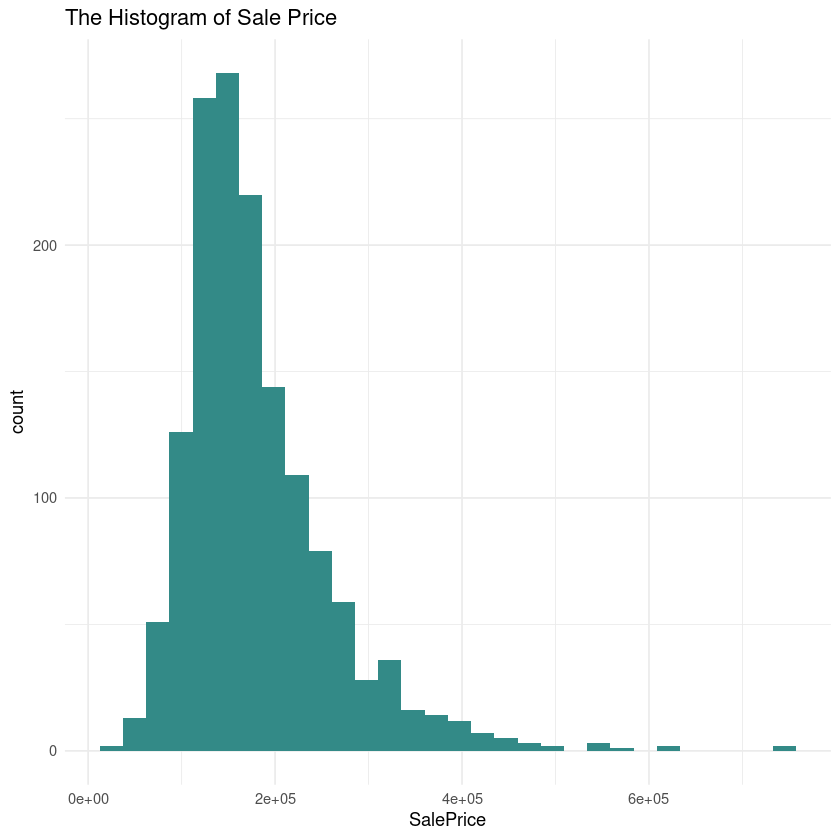

In [87]:
ggplot(df_preped, aes(SalePrice)) +
 geom_histogram(fill = "#338a87") +
 theme_minimal() +
 labs(title =  "The Histogram of Sale Price")

Average and Median of Sale Price

In [80]:
df_preped %>%
	summarise(Avg_price = mean(SalePrice),
			  Med_price = median(SalePrice),
			 )

Avg_price,Med_price
<dbl>,<dbl>
180921.2,163000


Standart Diviation and Inter Quartile range of Sale Price

In [17]:
df_preped %>%
	summarise(Std_price = sd(SalePrice),
			  IQR_price = IQR(SalePrice))

Std_price,IQR_price
<dbl>,<dbl>
79442.5,84025


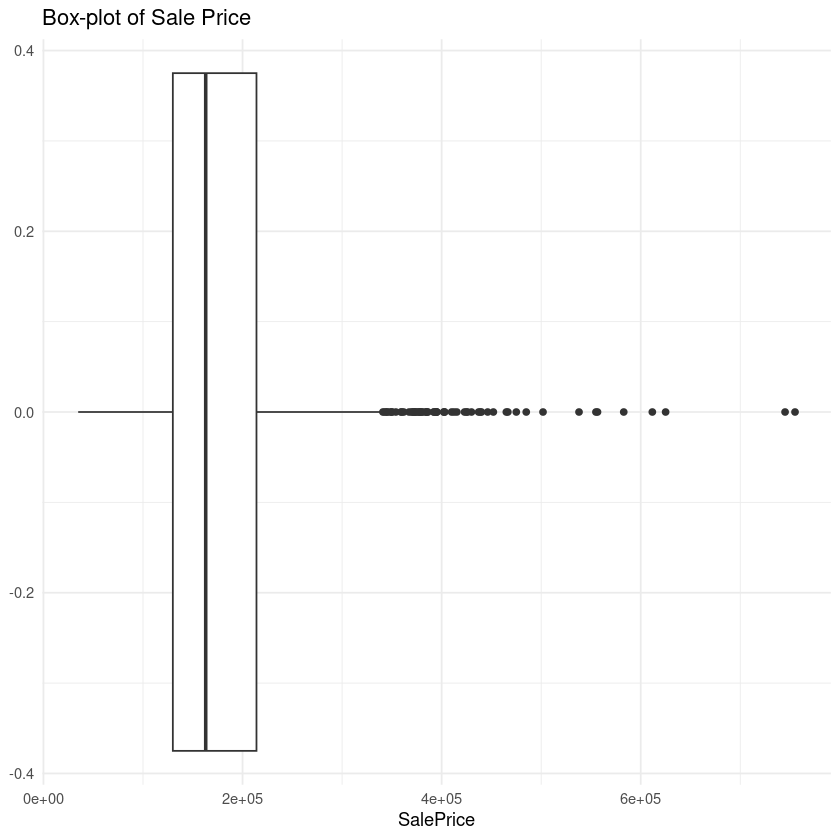

In [82]:
df_preped %>%
	ggplot(aes(SalePrice)) +
	geom_boxplot() +
	theme_minimal() +
	labs(title = "Box-plot of Sale Price")

Checking NA value in each Column
- 19 columns that contain NA value

In [70]:
col_with_na <- colSums(is.na(df_preped)) > 0
no_of_na <- df_preped[, col_with_na, drop = T]
colSums(is.na(no_of_na))
	

LotFrontage        Alley   MasVnrType   MasVnrArea     BsmtQual     BsmtCond 
         259         1369            8            8           37           37 
BsmtExposure BsmtFinType1 BsmtFinType2   Electrical  FireplaceQu   GarageType 
          38           37           38            1          690           81 
 GarageYrBlt GarageFinish   GarageQual   GarageCond       PoolQC        Fence 
          81           81           81           81         1453         1179 
 MiscFeature 
        1406

## Step 2 : Cleaing and Preparing Dataset

Drop column Id from dataset

In [143]:
df_preped <- df %>%
	select(-Id)

head(df_preped , 5)


MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,⋯,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
<dbl>,<chr>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,⋯,<dbl>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<dbl>
60,RL,65,8450,Pave,NA,Reg,Lvl,AllPub,Inside,⋯,0,NA,NA,NA,0,2,2008,WD,Normal,208500
20,RL,80,9600,Pave,NA,Reg,Lvl,AllPub,FR2,⋯,0,NA,NA,NA,0,5,2007,WD,Normal,181500
60,RL,68,11250,Pave,NA,IR1,Lvl,AllPub,Inside,⋯,0,NA,NA,NA,0,9,2008,WD,Normal,223500
70,RL,60,9550,Pave,NA,IR1,Lvl,AllPub,Corner,⋯,0,NA,NA,NA,0,2,2006,WD,Abnorml,140000
60,RL,84,14260,Pave,NA,IR1,Lvl,AllPub,FR2,⋯,0,NA,NA,NA,0,12,2008,WD,Normal,250000


Replace NA value with 0 in Numerical Column

In [144]:
## replace every numneric columns that contain NA with 0
df_preped <- df_preped %>%
	mutate_if(is.numeric, ~ifelse(is.na(.), 0, (.)))

Replace NA value with "DH" in Numerical Column

In [145]:
## replace every charactor columns that contain NA with "None"
df_preped <- df_preped %>%
	mutate_if(is.character, ~ifelse(is.na(.), "DH", (.)))

In [146]:
colSums(is.na(df_preped))

MSSubClass      MSZoning   LotFrontage       LotArea        Street 
            0             0             0             0             0 
        Alley      LotShape   LandContour     Utilities     LotConfig 
            0             0             0             0             0 
    LandSlope  Neighborhood    Condition1    Condition2      BldgType 
            0             0             0             0             0 
   HouseStyle   OverallQual   OverallCond     YearBuilt  YearRemodAdd 
            0             0             0             0             0 
    RoofStyle      RoofMatl   Exterior1st   Exterior2nd    MasVnrType 
            0             0             0             0             0 
   MasVnrArea     ExterQual     ExterCond    Foundation      BsmtQual 
            0             0             0             0             0 
     BsmtCond  BsmtExposure  BsmtFinType1    BsmtFinSF1  BsmtFinType2 
            0             0             0             0             0 
   BsmtFinSF2     BsmtUnfSF   TotalBsmtSF       Heating     HeatingQC 
            0             0             0             0             0 
   CentralAir    Electrical      1stFlrSF      2ndFlrSF  LowQualFinSF 
            0             0             0             0             0 
    GrLivArea  BsmtFullBath  BsmtHalfBath      FullBath      HalfBath 
            0             0             0             0             0 
 BedroomAbvGr  KitchenAbvGr   KitchenQual  TotRmsAbvGrd    Functional 
            0             0             0             0             0 
   Fireplaces   FireplaceQu    GarageType   GarageYrBlt  GarageFinish 
            0             0             0             0             0 
   GarageCars    GarageArea    GarageQual    GarageCond    PavedDrive 
            0             0             0             0             0 
   WoodDeckSF   OpenPorchSF EnclosedPorch     3SsnPorch   ScreenPorch 
            0             0             0             0             0 
     PoolArea        PoolQC         Fence   MiscFeature       MiscVal 
            0             0             0             0             0 
       MoSold        YrSold      SaleType SaleCondition     SalePrice 
            0             0             0             0             0

Convert Charactor Column to Factor

In [147]:
char_col <- sapply(df_preped, is.character)
df_preped[char_col] <- lapply(df_preped[char_col], as.factor)


In [14]:
str(df_preped)

tibble [1,460 × 80] (S3: tbl_df/tbl/data.frame)
 $ MSSubClass   : num [1:1460] 60 20 60 70 60 50 20 60 50 190 ...
 $ MSZoning     : Factor w/ 5 levels "C (all)","FV",..: 4 4 4 4 4 4 4 4 5 4 ...
 $ LotFrontage  : num [1:1460] 65 80 68 60 84 85 75 0 51 50 ...
 $ LotArea      : num [1:1460] 8450 9600 11250 9550 14260 ...
 $ Street       : Factor w/ 2 levels "Grvl","Pave": 2 2 2 2 2 2 2 2 2 2 ...
 $ Alley        : Factor w/ 3 levels "DH","Grvl","Pave": 1 1 1 1 1 1 1 1 1 1 ...
 $ LotShape     : Factor w/ 4 levels "IR1","IR2","IR3",..: 4 4 1 1 1 1 4 1 4 4 ...
 $ LandContour  : Factor w/ 4 levels "Bnk","HLS","Low",..: 4 4 4 4 4 4 4 4 4 4 ...
 $ Utilities    : Factor w/ 2 levels "AllPub","NoSeWa": 1 1 1 1 1 1 1 1 1 1 ...
 $ LotConfig    : Factor w/ 5 levels "Corner","CulDSac",..: 5 3 5 1 3 5 5 1 5 1 ...
 $ LandSlope    : Factor w/ 3 levels "Gtl","Mod","Sev": 1 1 1 1 1 1 1 1 1 1 ...
 $ Neighborhood : Factor w/ 25 levels "Blmngtn","Blueste",..: 6 25 6 7 14 12 21 17 18 4 ...
 $ Condition1   : Fac

From above, We will see that the distribution of sale price are right-sklewed and box-plot showing the outliner of sale price. We take nature log to sale price to handle with those problems


In [148]:
## Using log tranform the SalePrice variable
df_final <- df_preped %>% 
	mutate(LogSalePrice = log(SalePrice)) %>%
	select(-SalePrice)

head(df_final)

MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,⋯,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,LogSalePrice
<dbl>,<fct>,<dbl>,<dbl>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,⋯,<dbl>,<fct>,<fct>,<fct>,<dbl>,<dbl>,<dbl>,<fct>,<fct>,<dbl>
60,RL,65,8450,Pave,DH,Reg,Lvl,AllPub,Inside,⋯,0,DH,DH,DH,0,2,2008,WD,Normal,12.24769
20,RL,80,9600,Pave,DH,Reg,Lvl,AllPub,FR2,⋯,0,DH,DH,DH,0,5,2007,WD,Normal,12.10901
60,RL,68,11250,Pave,DH,IR1,Lvl,AllPub,Inside,⋯,0,DH,DH,DH,0,9,2008,WD,Normal,12.31717
70,RL,60,9550,Pave,DH,IR1,Lvl,AllPub,Corner,⋯,0,DH,DH,DH,0,2,2006,WD,Abnorml,11.84940
60,RL,84,14260,Pave,DH,IR1,Lvl,AllPub,FR2,⋯,0,DH,DH,DH,0,12,2008,WD,Normal,12.42922
50,RL,85,14115,Pave,DH,IR1,Lvl,AllPub,Inside,⋯,0,DH,MnPrv,Shed,700,10,2009,WD,Normal,11.87060


After taking nature Log( ), the distribution of sale price are close to normal and less outliner

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


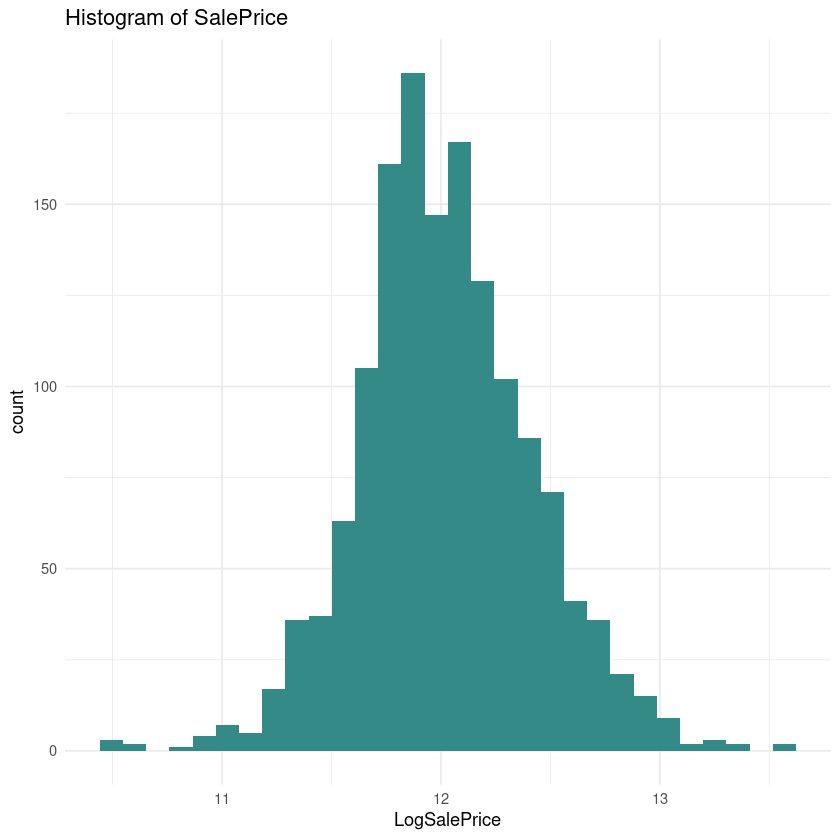

In [91]:
## Distribution of log(SalePrice)
df_final %>%
	ggplot(aes(x = LogSalePrice)) +
	geom_histogram(fill = "#338a87") +
	theme_minimal() +
	labs(title =  "Histogram of SalePrice")


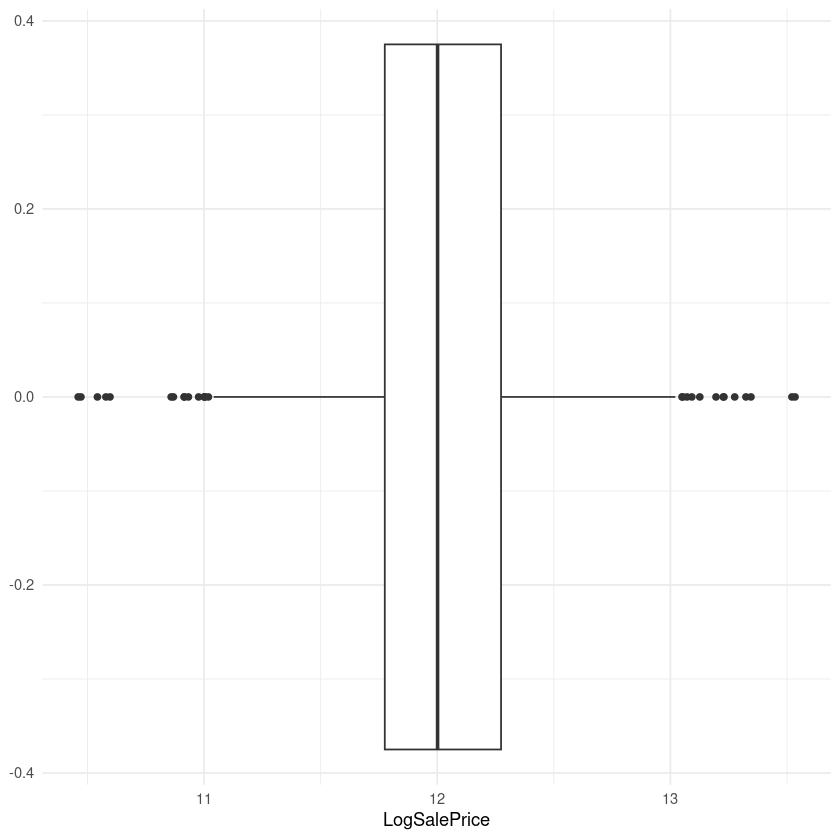

In [90]:
df_final %>%
	ggplot(aes(x = LogSalePrice)) +
	geom_boxplot() +
	theme_minimal() +
	labs(titel = "Box-plot of SalePrice")

## Step 3 : Spliting, Training and Evaluate Model Perfomance

Split dataset to 80% of Traing set and 20% of Testing set

In [22]:
## Split data 80 Train : 20 Test
set.seed(66)
n <- nrow(df_final)
id <- sample(1:n, size = n * 0.8)
train_df <- df_final[id, ]
test_df <- df_final[-id, ]

cat("Number of Traing Data : ", nrow(train_df), "\n")
cat("Number of Test Data : ", nrow(test_df))


Number of Traing Data :  1168 
Number of Test Data :  292

Use K folder Cross Validation for Resample Technique

In [92]:
## Using K folder Cross Validation for Resample Technique
ctrl <- trainControl(
	method = "cv",
	number = 5,
	#verboseIter = T
)

Create function for evaluate the model (MAE, MSE, RMES)

In [24]:
## function for evaluate model
evaluate_model <- function(actual, predicted) {
	mae <- mean(abs(actual - predicted))
	mse <- mean((actual - predicted) ** 2)
	rmse <- sqrt(mean((actual - predicted) ** 2))
	return(list(MAE = mae, MSE = mse, RMSE = rmse))
}

Model 1 : Train Linear Regression For Baseline Model
- let r do data preprocessing (Normalization)

In [25]:
## Linear Regression For Baseline model
lm_model <- train(
	LogSalePrice ~ .,
	data = train_df,
	method = "lm",
	trControl = ctrl,
	preProcess = c("center", "scale")
)

Warning message in preProcess.default(thresh = 0.95, k = 5, freqCut = 19, uniqueCut = 10, :
“These variables have zero variances: Condition1RRNe, Condition2PosA, Condition2RRAe, Condition2RRAn, RoofStyleShed, RoofMatlMembran, RoofMatlRoll, ExterCondPo, BsmtCondPo, HeatingOthW, ElectricalMix, GarageQualEx, GarageCondEx, PoolQCEx, PoolQCGd, MiscFeatureOthr”
Warning message:
“In lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) :
 extra argument ‘trainControl’ will be disregarded”
Warning message in predict.lm(modelFit, newdata):
“prediction from a rank-deficient fit may be misleading”
Warning message in preProcess.default(thresh = 0.95, k = 5, freqCut = 19, uniqueCut = 10, :
“These variables have zero variances: Condition1RRNe, Condition2PosA, Condition2RRAe, Condition2RRAn, RoofMatlMembran, RoofMatlMetal, RoofMatlRoll, Exterior1stAsphShn, Exterior2ndAsphShn, Exterior2ndOther, GarageQualEx, GarageCondEx”
Warning message:
“In lm.fit(x, y, offset = offset, singular.ok = singula

In [26]:
lm_model$results

,intercept,RMSE,Rsquared,MAE,RMSESD,RsquaredSD,MAESD
,<lgl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,TRUE,0.1830968,0.8075074,0.1077282,0.04791233,0.08201522,0.0081176


In [27]:
predicted_1 <- predict(lm_model, newdata = test_df)
model1 <- evaluate_model(test_df$LogSalePrice, predicted_1)


Warning message in predict.lm(modelFit, newdata):
“prediction from a rank-deficient fit may be misleading”


Model 2 : Random Forest
- let r do data preprocessing (Normalization)
- let r do hyperparameter tuning (mtry)


In [29]:
rf_model <- train(
	LogSalePrice ~ .,
	data = train_df,
	method = "rf",
	trainControl = ctrl,
)

In [139]:
rf_model

Random Forest 

1168 samples
  79 predictor

No pre-processing
Resampling: Bootstrapped (25 reps) 
Summary of sample sizes: 1168, 1168, 1168, 1168, 1168, 1168, ... 
Resampling results across tuning parameters:

  mtry  RMSE       Rsquared   MAE       
    2   0.2324515  0.7988066  0.16316655
  131   0.1443552  0.8719161  0.09656308
  261   0.1509103  0.8573630  0.10273411

RMSE was used to select the optimal model using the smallest value.
The final value used for the model was mtry = 131.

In [31]:
predict_2 <- predict(rf_model, newdata = test_df)
model2 <- evaluate_model(test_df$LogSalePrice, predict_2)

Model 3 : Elastic Net
- let r do data preprocessing (Normalization)
- let r do hyperparameter tuning (alpha, lambda)

In [33]:
## glmnet
glmnet_model <- train(
	LogSalePrice ~ .,
	data = train_df,
	method = "glmnet",
	trainControl = ctrl,
	preProcess = c("center", "scale"),
	tuneLength = 5
)

Warning message in preProcess.default(method = c("center", "scale"), x = structure(c(20, :
“These variables have zero variances: Condition2RRAe, GarageQualEx, GarageCondEx”
Warning message in preProcess.default(thresh = 0.95, k = 5, freqCut = 19, uniqueCut = 10, :
“These variables have zero variances: Condition2RRAe, RoofMatlMembran, Exterior1stCBlock, Exterior1stImStucc, Exterior2ndCBlock, Exterior2ndOther, ElectricalFuseP, GarageQualEx, GarageCondEx, PoolQCGd, MiscFeatureGar2, SaleTypeCon”
Warning message in preProcess.default(thresh = 0.95, k = 5, freqCut = 19, uniqueCut = 10, :
“These variables have zero variances: Condition2RRAe, RoofMatlMembran, Exterior1stCBlock, Exterior1stImStucc, Exterior2ndCBlock, Exterior2ndOther, ElectricalFuseP, GarageQualEx, GarageCondEx, PoolQCGd, MiscFeatureGar2, SaleTypeCon”
Warning message in preProcess.default(thresh = 0.95, k = 5, freqCut = 19, uniqueCut = 10, :
“These variables have zero variances: Condition2RRAe, RoofMatlMembran, Exterior1stCBloc

In [34]:
glmnet_model

glmnet 

1168 samples
  79 predictor

Pre-processing: centered (261), scaled (261) 
Resampling: Bootstrapped (25 reps) 
Summary of sample sizes: 1168, 1168, 1168, 1168, 1168, 1168, ... 
Resampling results across tuning parameters:

  alpha  lambda        RMSE       Rsquared   MAE       
  0.100  0.0003021122  0.1543620  0.8545384  0.09963135
  0.100  0.0014022807  0.1486382  0.8638952  0.09653858
  0.100  0.0065088104  0.1399898  0.8776710  0.09077440
  0.100  0.0302112216  0.1325373  0.8895034  0.08572014
  0.100  0.1402280690  0.1420209  0.8825497  0.09532726
  0.325  0.0003021122  0.1518775  0.8586742  0.09815244
  0.325  0.0014022807  0.1430296  0.8729538  0.09278281
  0.325  0.0065088104  0.1349227  0.8856482  0.08636482
  0.325  0.0302112216  0.1357141  0.8859225  0.08849005
  0.325  0.1402280690  0.1687424  0.8603792  0.11725152
  0.550  0.0003021122  0.1496809  0.8622894  0.09685655
  0.550  0.0014022807  0.1403587  0.8772089  0.09049460
  0.550  0.0065088104  0.1334682  0.8878

In [35]:
predict_3 <- predict(glmnet_model, newdata = train_df)
model3 <-evaluate_model(test_df$LogSalePrice, predict_3)

Model 4 : eXtreme Gradient Boosting
- let r do data preprocessing (Normalization)
- let r do hyperparameter tuning (nrounds, lambda, alpha, eta)

In [37]:
xgb_model <- train(
	LogSalePrice ~ .,
	data = train_df,
	method = "xgbLinear",
	trainControl = ctrl
)

[17:32:33] WARNING: src/learner.cc:767: 
Parameters: { "trainControl" } are not used.

[17:32:33] WARNING: src/learner.cc:767: 
Parameters: { "trainControl" } are not used.

[17:32:34] WARNING: src/learner.cc:767: 
Parameters: { "trainControl" } are not used.

[17:32:34] WARNING: src/learner.cc:767: 
Parameters: { "trainControl" } are not used.

[17:32:35] WARNING: src/learner.cc:767: 
Parameters: { "trainControl" } are not used.

[17:32:35] WARNING: src/learner.cc:767: 
Parameters: { "trainControl" } are not used.

[17:32:35] WARNING: src/learner.cc:767: 
Parameters: { "trainControl" } are not used.

[17:32:36] WARNING: src/learner.cc:767: 
Parameters: { "trainControl" } are not used.

[17:32:36] WARNING: src/learner.cc:767: 
Parameters: { "trainControl" } are not used.

[17:32:37] WARNING: src/learner.cc:767: 
Parameters: { "trainControl" } are not used.

[17:32:38] WARNING: src/learner.cc:767: 
Parameters: { "trainControl" } are not used.

[17:32:39] WARNING: src/learner.cc:767: 
Pa

In [38]:
xgb_model

eXtreme Gradient Boosting 

1168 samples
  79 predictor

No pre-processing
Resampling: Bootstrapped (25 reps) 
Summary of sample sizes: 1168, 1168, 1168, 1168, 1168, 1168, ... 
Resampling results across tuning parameters:

  lambda  alpha  nrounds  RMSE       Rsquared   MAE       
  0e+00   0e+00   50      0.1533608  0.8531531  0.10539903
  0e+00   0e+00  100      0.1532538  0.8533615  0.10537014
  0e+00   0e+00  150      0.1532589  0.8533522  0.10537185
  0e+00   1e-04   50      0.1532315  0.8533702  0.10506224
  0e+00   1e-04  100      0.1531994  0.8534026  0.10504295
  0e+00   1e-04  150      0.1531880  0.8534294  0.10503703
  0e+00   1e-01   50      0.1452431  0.8684859  0.09997424
  0e+00   1e-01  100      0.1451882  0.8685792  0.09986876
  0e+00   1e-01  150      0.1451882  0.8685792  0.09986876
  1e-04   0e+00   50      0.1529933  0.8537179  0.10528906
  1e-04   0e+00  100      0.1529277  0.8538391  0.10526208
  1e-04   0e+00  150      0.1529290  0.8538303  0.10526702
  1e-04   

In [39]:
predict_4 <- predict(xgb_model, newdata = train_df)
model4 <-evaluate_model(test_df$LogSalePrice, predict_4)

## Step 4 : Evaluate Model, Selecting Best Model Performance and Concluding  


In [104]:
model <- c('Linear Regression', 'Random Forest', 'Elastic Net', 'XgBoost')
MAE <- c(model1$MAE, model2$MAE, model3$MAE, model4$MAE)
MSE <- c(model1$MSE, model2$MSE, model3$MSE, model4$MSE)
RMSE <- c(model1$RMSE, model2$RMSE, model3$RMSE, model4$RMSE)

model_result <- data.frame(
	model,
	MAE,
	MSE,
	RMSE
)
model_result


model,MAE,MSE,RMSE
<chr>,<dbl>,<dbl>,<dbl>
Linear Regression,0.10025020,0.03810965,0.1952169
Random Forest,0.09833316,0.02139634,0.1462749
Elastic Net,0.43166740,0.29860213,0.5464450
XgBoost,0.43995866,0.31304095,0.5595006


Selecting Rondom Forest model due to the lowest RMSE

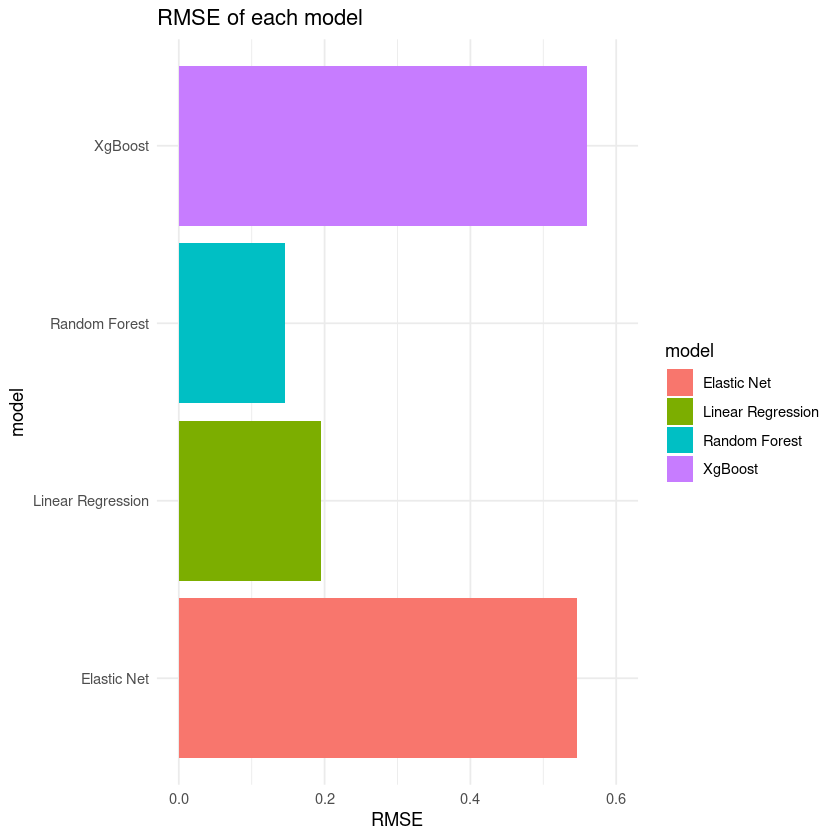

In [122]:
model_result %>%
	arrange(RMSE) %>%
	ggplot(aes(y = RMSE, x = model, fill = model)) +
	geom_col() +
	ylim(0, 0.6) +
	theme_minimal() +
	labs(title = "RMSE of each model") +
	coord_flip()

The feature that important in model

In [44]:
## Random Forest has lowest RMSE
varImp(rf_model)

rf variable importance

  only 20 most important variables shown (out of 261)

             Overall
OverallQual  100.000
GrLivArea     54.936
YearBuilt     32.335
TotalBsmtSF   14.839
GarageArea    13.780
GarageCars    12.033
`1stFlrSF`    11.919
ExterQualTA    7.583
BsmtFinSF1     5.913
FullBath       5.836
GarageYrBlt    5.618
LotArea        4.872
Fireplaces     4.177
CentralAirY    3.477
YearRemodAdd   3.402
`2ndFlrSF`     3.279
OverallCond    2.898
BsmtQualEx     2.193
BsmtUnfSF      1.763
MasVnrArea     1.524

In [152]:
## final dataset
df_last <- df_final
final_predict <- predict(rf_model, newdata = df_last)
df_last <- df_last %>%
	mutate(LogPredicted = final_predict) %>%
	mutate(error = LogSalePrice - LogPredicted,
		   abs_error = abs(error),
		  )

head(df_last)

MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,⋯,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,LogSalePrice,LogPredicted,error,abs_error
<dbl>,<fct>,<dbl>,<dbl>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,⋯,<fct>,<dbl>,<dbl>,<dbl>,<fct>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>
60,RL,65,8450,Pave,DH,Reg,Lvl,AllPub,Inside,⋯,DH,0,2,2008,WD,Normal,12.24769,12.23804,0.009657257,0.009657257
20,RL,80,9600,Pave,DH,Reg,Lvl,AllPub,FR2,⋯,DH,0,5,2007,WD,Normal,12.10901,12.03488,0.074133680,0.074133680
60,RL,68,11250,Pave,DH,IR1,Lvl,AllPub,Inside,⋯,DH,0,9,2008,WD,Normal,12.31717,12.29936,0.017810262,0.017810262
70,RL,60,9550,Pave,DH,IR1,Lvl,AllPub,Corner,⋯,DH,0,2,2006,WD,Abnorml,11.84940,11.95265,-0.103252177,0.103252177
60,RL,84,14260,Pave,DH,IR1,Lvl,AllPub,FR2,⋯,DH,0,12,2008,WD,Normal,12.42922,12.59076,-0.161544268,0.161544268
50,RL,85,14115,Pave,DH,IR1,Lvl,AllPub,Inside,⋯,Shed,700,10,2009,WD,Normal,11.87060,11.91046,-0.039857697,0.039857697


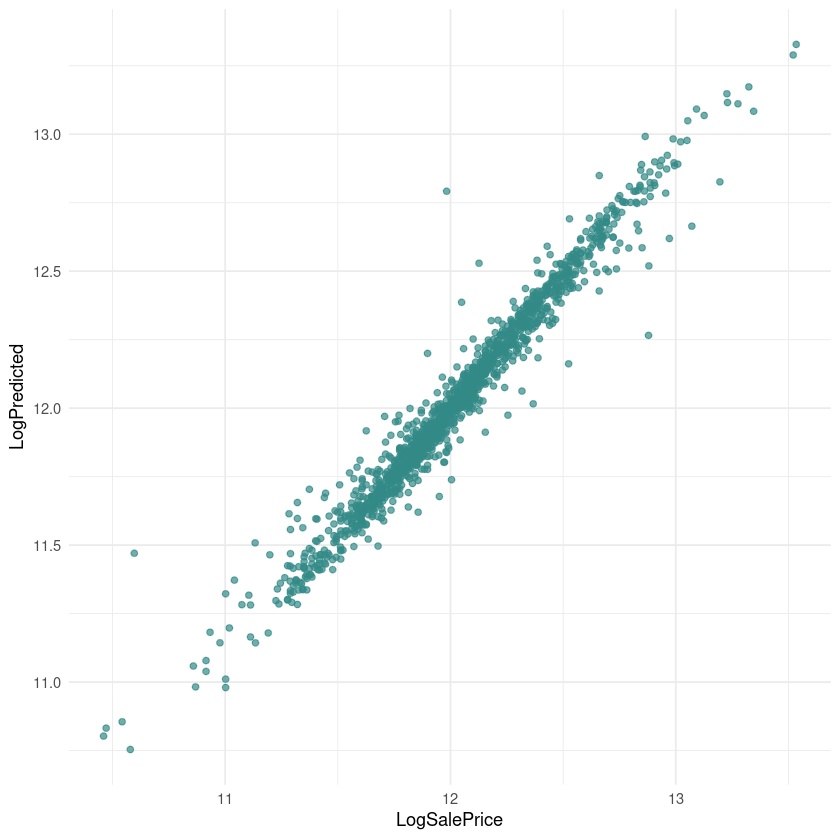

In [75]:
df_final %>%
	ggplot(aes(x = LogSalePrice, y = LogPredicted)) +
		geom_point(alpha = 0.7, col = "#338a87") +
		theme_minimal()

In [164]:
error_price <- cbind(df, df_last$LogPredicted)
final_error <- error_price %>%
	mutate(Predictied = exp(df_last$LogPredicted),
		   abs_error = abs(SalePrice - Predictied)) %>%
	select(SalePrice, Predictied, abs_error)

head(final_error)

,SalePrice,Predictied,abs_error
,<dbl>,<dbl>,<dbl>
1,208500,206496.2,2003.847
2,181500,168531.4,12968.618
3,223500,219554.6,3945.355
4,140000,155227.9,15227.937
5,250000,293831.1,43831.121
6,143000,148814.8,5814.762


In [160]:
final_error %>%
	summarize(Avg_error = round(mean(abs_error), 2))

Avg_error
<dbl>
9075.3


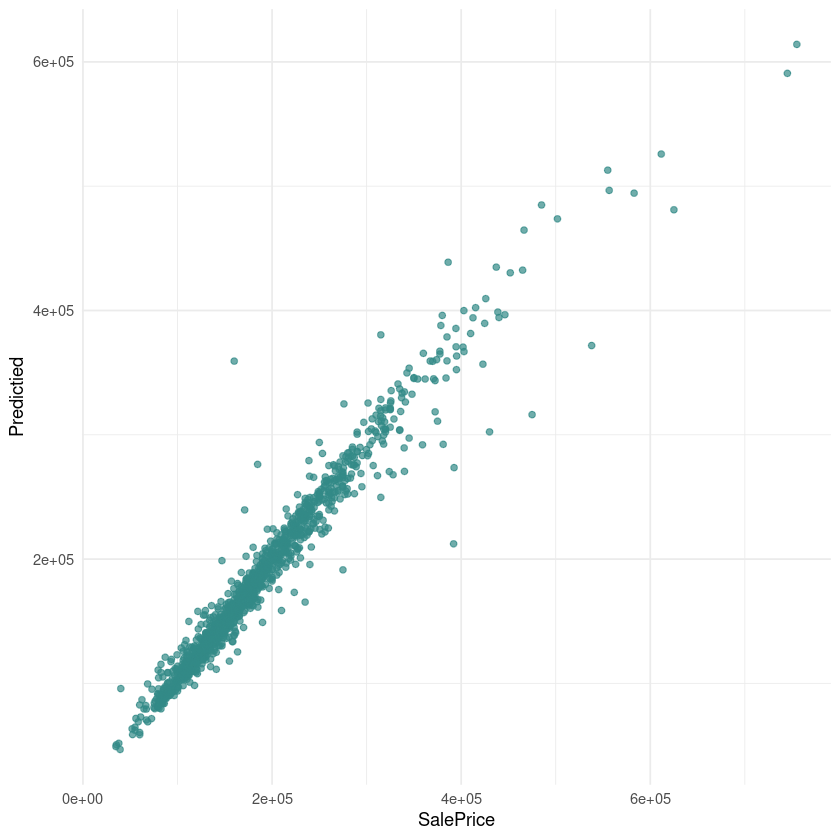

In [167]:
final_error %>%
	ggplot(aes(x = SalePrice, y= Predictied)) +
		geom_point(alpha = 0.7, col = "#338a87")+
		theme_minimal()

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


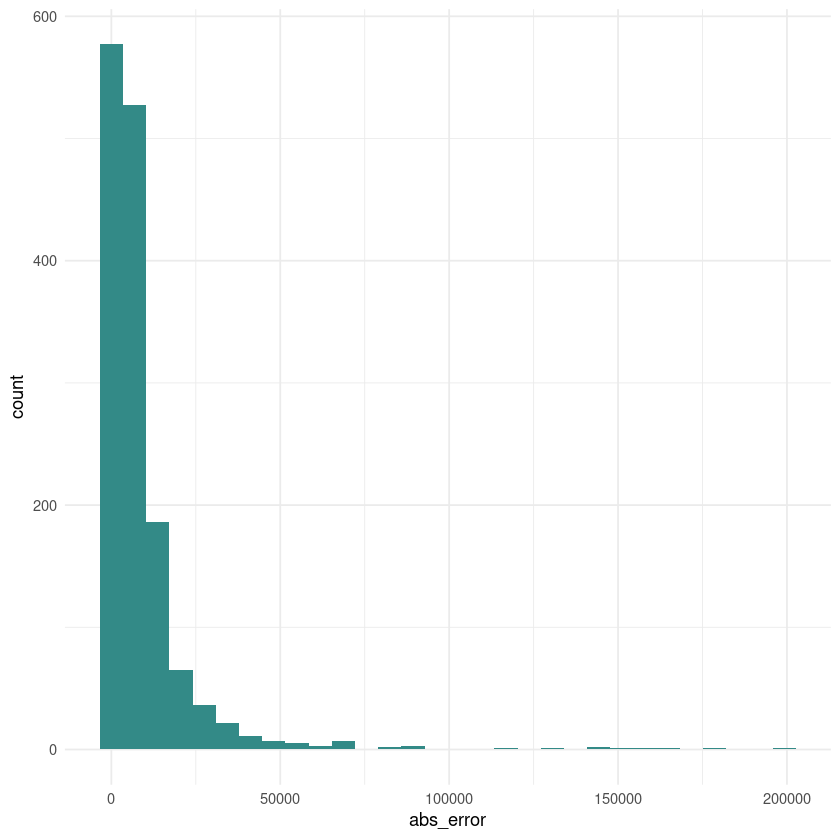

In [168]:
final_error %>%
	ggplot(aes(x = abs_error)) +
		geom_histogram(, fill = "#338a87")+
		theme_minimal()

## Conclusion
The Model that highest performace in this project is Random Forest with lowest the error around +- 9075.3 dollar